In [1]:
import os
os.sys.path.append('../lib/')
import numpy as np
import evaluate

# load test predictions and labels
holdout_analytes = ['Hb', 'Ca', 'FT4', 'AST', 'LACT', 'GGT', 'TSH', 'IgE', 'CRP', 'LDH']
files_test = []
p_test = []
y_test = []
model_path = './models/'
for i in holdout_analytes:
    files_test.append(np.load(model_path+'model_'+i+'/data/files_test.npy'))
    p_test.append(np.load(model_path+'model_'+i+'/model_test_p_scaled.npy'))
    y_test.append(np.load(model_path+'model_'+i+'/model_test_y_scaled.npy'))
files_test = np.hstack(files_test)
p_test = np.vstack(p_test)
y_test = np.vstack(y_test)
ans_test = np.array([i.split('/')[-2] for i in files_test])



Number of samples per analyte in test set
Hb      288
Ca      288
FT4     288
AST     288
LACT    288
GGT     288
TSH     288
IgE     288
CRP     288
LDH     288
Name: an, dtype: int64

Example predictions


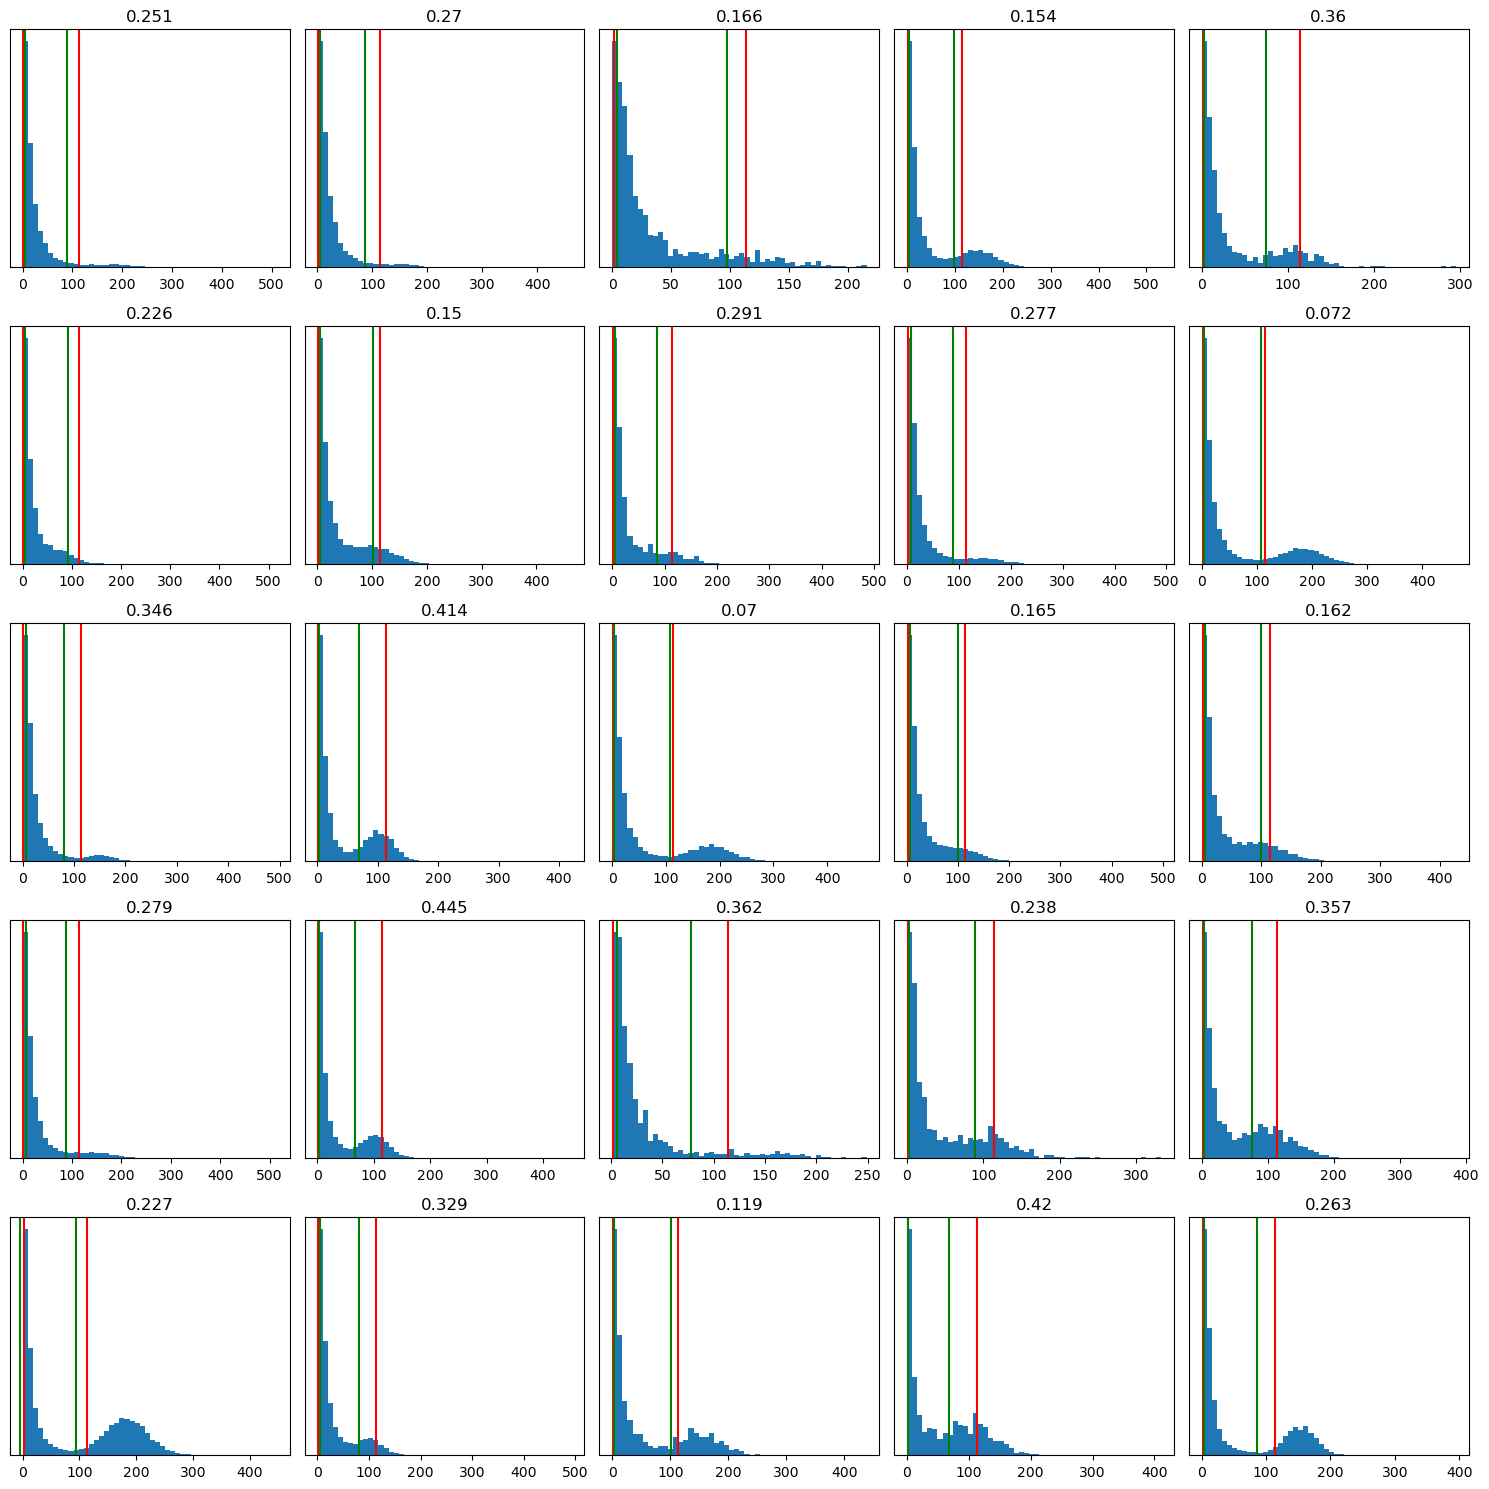


Error per analyte
IgE  -  0.045  z-score dev. nan's
  analyte  zscore_dev  norm_errors
0      Hb    0.209531     0.106905
1      Ca    0.303779     0.155188
2     FT4    0.162115     0.081798
3     AST    0.164321     0.088035
4    LACT    0.203713     0.123749
5     GGT    0.178024     0.099676
6     TSH    0.272241     0.163767
7     IgE    0.566267     0.261211
8     CRP    0.288612     1.426187
9     LDH    0.295635     0.112978
Average z-score deviation:	 0.2644237895956283
Average norm. error:		 0.26194930006701106

Error per skew group
['TSH', 'IgE']  -  0.023  z-score dev. nan's
                group  zscore_dev  norm_errors
0              normal    0.225142     0.114630
1              skewed    0.182019     0.103820
2      heavily_skewed    0.415860     0.212489
3  skewed_and_shifted    0.295635     0.112978

Error vs. pathological fraction
Pearson correlation between error and path. frac.:
PearsonRResult(statistic=0.31283352172000056, pvalue=2.048942084857946e-66)


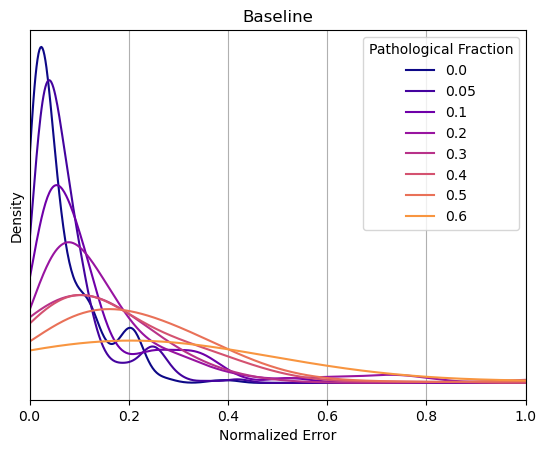


Error vs. sample size
Pearson correlation between error and sample size:
PearsonRResult(statistic=-0.0145720777874675, pvalue=0.43437810321943043)


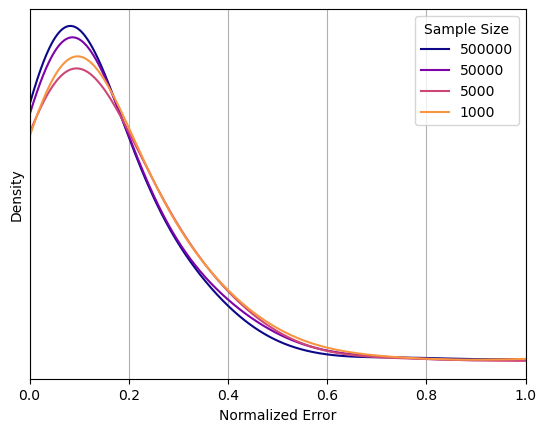

In [2]:

evaluate.full_evaluation(p_test, y_test, files_test)
